# An Analysis of the City of Toronto’s Fire Response between 2011-2019 
## by The City of Toronto Department of Pandas¶

The goal of this project is to create a predictive model capable of determining response time given inputs such as day, time, or location. Exploratory data analysis is iterative, therefore, until our exploratory data analysis is conducted, we will not know exactly which features will be used to implement the model, nor do we know exactly what type of prediction model will be used (e.g., linear regression, logistic regression, or other approaches as suitable). However, an example of our anticipated model can be seen below. 

###  Objectives
The questions we hope to answer with our exploratory data analysis are: 
- Are there temporal trends in factors such as response time, damages, or other relevant factors? 

- Identify the characteristics of fires with extensive damage/casualties. What factors make a fire most/least likely to cause extensive damage/casualties? 

- Analyze and intersect our datasets to find the closest TFS station to each fire. Stations that frequently fail to respond in a timely manner to nearby fires may require more resources from the city. 

- Identify the common fire incidents and causes in each ward. 

- Optional: Is there a correlation between the resources TFS deploys (number of personnel, vehicles, etc.) during incidents and damages (such as casualties/financial)?  

- Optional: Overlay incidents with socio-economic profiles of each neighborhood and analyze whether TFS services are equally and equitably distributed across the city. Are TFS services biased when responding to certain incidents or wards of the city?
- test - Sami

## Setup Notebook

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import 3rd party libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.stats import chi2_contingency 

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Overview

The primary dataset to be used for this project includes information about Toronto’s Fire Incidents (https://open.toronto.ca/dataset/fire-incidents/). This data is a .csv file from the City of Toronto’s open data portal with details of over 17,000 fire incidents between January 1, 2011, to June 30, 2019. The dataset contains 43 columns that describe the geographic location of the fire, the TFS response, impact of the fire, suspected cause, and details of the site (e.g., building condition and presence of sprinklers or alarms). The dataset contains categorical variables, many null values, and string values in many of the columns. Extensive data cleaning and data wrangling as well as feature engineering is needed for this project. Feature engineering techniques such as categorical encoding, datetime extraction, imputation, etc. will be used for this project. The appendix shows the data types and categories of each of the columns in the dataset.

The rest of the datasets described in this paragraph are secondary datasets that will only be used if time allows. The second dataset is the City of Toronto Wards data which includes spatial boundaries that we can overlay with the fire incident data for visualization purposes (https://open.toronto.ca/dataset/city-wards/). The third dataset is a .GeoJSON file with Toronto Fire station locations (https://open.toronto.ca/dataset/fire-station-locations/). Finally, if time allows, we will use a fourth dataset of Toronto’s neighbourhoods which includes information on variables such as income, population, household type, and education (https://open.toronto.ca/dataset/neighbourhood-profiles/).

# Import Data
Let's import the training datasets.

### Toronto Fire Incidents

In [3]:
fire_data = pd.read_csv('Fire Incidents Data.csv')

In [4]:
fire_data.head(10)

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,578689,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-24T21:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0
1,578690,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-24T21:29:42,...,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0
2,578691,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T13:29:59,2018-02-25T13:36:49,0
3,578692,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-25T14:19:25,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,2018-02-25T14:13:39,2018-02-25T14:18:07,0
4,578693,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:20:43,2018-02-25T18:26:19,0
5,578694,81 - Engine Area,NaN,NaN,0,0,1500.0,NaN,NaN,2018-02-25T18:38:00,...,NaN,NaN,NaN,NaN,NaN,NaN,4 - Flames showing from small area (one storey...,2018-02-25T18:31:19,2018-02-25T18:35:17,0
6,578695,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),1 - No business interruption,0,0,2000.0,0.0,NaN,2018-02-26T18:28:00,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,7 - Not applicable: Occupant(s) first alerted ...,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-26T18:18:55,2018-02-26T18:24:47,0
7,578696,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0,0,100000.0,0.0,NaN,2018-02-27T10:57:32,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,2 - Some persons (at risk) self evacuated as a...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27T10:28:12,2018-02-27T10:35:13,0
8,578697,28 - Office,01 - Normal (no change),1 - No business interruption,0,0,5000.0,0.0,NaN,2018-02-25T15:57:00,...,98 - Not applicable: Alarm operated OR presenc...,2 - Hardwired (standalone),1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",3 - Did not activate: fire too small to trigge...,1 - Full sprinkler system present,4 - Flames showing from small area (one storey...,2018-02-25T15:48:34,2018-02-25T15:52:04,0
9,578698,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-26T15:32:11,2018-02-26T15:37:40,0


### Toronto Wards

For now, I have commented out the map plot until we need it again.

In [5]:
# Write your code here.
ward = gpd.read_file('25-ward-model-december-2018-wgs84-latitude-longitude') #importing shapefile

# # View GeoDataFrame
ward.head()
# ward.plot(figsize=(15, 8), edgecolor='w', alpha=0.75);

,AREA_ID,AREA_TYPE,AREA_S_CD,AREA_L_CD,AREA_NAME,X,Y,LONGITUDE,LATITUDE,geometry
0,2551040,WD18,16,16,Don Valley East,318237.290,4844000.0,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.31950 43.715..."
1,2551044,WD18,03,03,Etobicoke-Lakeshore,303099.474,4831000.0,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,2551048,WD18,15,15,Don Valley West,314825.876,4843000.0,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,2551052,WD18,23,23,Scarborough North,324522.149,4852000.0,-79.25467,43.809672,"POLYGON ((-79.22591 43.83960, -79.22556 43.839..."
4,2551056,WD18,11,11,University-Rosedale,313306.543,4837000.0,-79.39432,43.671139,"POLYGON ((-79.39004 43.69050, -79.39004 43.690..."


# Data Cleaning

In [6]:
fire_data.head()

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,578689,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-24T21:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0
1,578690,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-24T21:29:42,...,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0
2,578691,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T13:29:59,2018-02-25T13:36:49,0
3,578692,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-25T14:19:25,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,2018-02-25T14:13:39,2018-02-25T14:18:07,0
4,578693,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:20:43,2018-02-25T18:26:19,0


## Irrelevant Data
First, we can begin by eliminating columns that we know, for sure, that we do not need. At the moment, this includes the "Incident_Number" and "Exposure" columns. "Incident_Number" because it is essentially equivalent to "_id", and "Exposure" because 98% of the data in this column are null.

In [7]:
fire_data = fire_data.drop(['Exposures', 'Incident_Number'], axis = 1)
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 41 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   _id                                                            17536 non-null  int64  
 1   Area_of_Origin                                                 15623 non-null  object 
 2   Building_Status                                                11216 non-null  object 
 3   Business_Impact                                                11214 non-null  object 
 4   Civilian_Casualties                                            17536 non-null  int64  
 5   Count_of_Persons_Rescued                                       17536 non-null  int64  
 6   Estimated_Dollar_Loss                                          15627 non-null  float64
 7   Estimated_Number_Of_Persons_Displaced                     

## Missing Data
Next, it is important to understand the number of null values and how to approach eliminating or changing those values. It appears that the columns with null values are split into approximately 5 different categories.

First, we have columns missing about 36% (n = ~6300) rows of their data (mostly columns pertaining to fire alarm, smoke alarm, or sprinklers).

Second, we have columns missing about 10% (n = ~1900) rows of their data.

Third, we have one column missing 85 rows of data. This is the "Incident_Ward" column.

Fourth, we have four columns all missing 1 value. "Intersection", "Longitude", "Latitude", and "Property_Use".

Fifth, we have 12 columns with zero null values.

In [8]:
fire_data.isnull().sum().sort_values(ascending = False)

Sprinkler_System_Presence                                        6322
Fire_Alarm_System_Impact_on_Evacuation                           6322
Smoke_Alarm_at_Fire_Origin                                       6322
Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation    6322
Smoke_Spread                                                     6322
Level_Of_Origin                                                  6322
Sprinkler_System_Operation                                       6322
Smoke_Alarm_at_Fire_Origin_Alarm_Type                            6322
Fire_Alarm_System_Presence                                       6322
Fire_Alarm_System_Operation                                      6322
Smoke_Alarm_at_Fire_Origin_Alarm_Failure                         6322
Business_Impact                                                  6322
Extent_Of_Fire                                                   6322
Estimated_Number_Of_Persons_Displaced                            6321
Building_Status     

In [9]:
# Finding rows that the 85 null Incident_Ward values are in. Is there a way for us to fill these? Why are they null? A lot seem to include "Steeles Ave"
fire_data[fire_data['Incident_Ward'].isnull()]

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
211,578900,"44 - Trash, Rubbish Storage (inc garbage chute...",NaN,NaN,0,0,0.0,NaN,2018-01-20T06:14:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2018-01-20T06:06:46,2018-01-20T06:13:44,0
214,578903,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-04T08:59:06,2018-03-04T09:05:54,0
565,579254,83 - Electrical Systems,NaN,NaN,0,0,20000.0,NaN,2018-02-12T09:10:50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2018-02-12T09:01:02,2018-02-12T09:07:01,0
1417,580106,42 - Garage,01 - Normal (no change),9 - Undetermined,0,0,0.0,0.0,2019-01-25T18:57:07,1 - Confined to object of origin,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",5 - Multi unit bldg: spread beyond suite of or...,1 - Sprinkler system activated,1 - Full sprinkler system present,1 - Fire extinguished prior to arrival,2019-01-25T18:55:30,2019-01-25T18:56:07,0
2274,580963,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-21T22:16:18,2019-04-21T22:22:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16858,595547,"31 - Process Manufacturing (inc manf, prod ass...",08 - Not Applicable,1 - No business interruption,0,0,5000.0,0.0,2017-08-21T17:32:21,1 - Confined to object of origin,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,9 - Undetermined,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,1 - Full sprinkler system present,4 - Flames showing from small area (one storey...,2017-08-21T17:17:01,2017-08-21T17:23:08,0
16925,595614,29 - Electronic Equipment,01 - Normal (no change),2 - May resume operations within a week,0,0,1000.0,0.0,2017-11-02T00:24:30,2 - Confined to part of room/area of origin,...,4 - Remote from fire – smoke did not reach alarm,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present","4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,3 - Fire with smoke showing only - including v...,2017-11-02T00:15:43,2017-11-02T00:22:44,0
17034,595723,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),1,0,500.0,0.0,2017-12-01T17:50:59,2 - Confined to part of room/area of origin,...,98 - Not applicable: Alarm operated OR presenc...,4 - Interconnected,1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2017-12-01T17:40:21,2017-12-01T17:46:49,0
17203,595892,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),1,0,4000.0,0.0,2014-05-26T17:33:27,2 - Confined to part of room/area of origin,...,98 - Not applicable: Alarm operated OR presenc...,2 - Hardwired (standalone),3 - No one (at risk) evacuated as a result of ...,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,3 - Fire with smoke showing only - including v...,2014-05-26T17:22:50,2014-05-26T17:26:59,0


In [10]:
# Finding row that the singular Latitude, Longitude, Intersection null value is in
fire_data[fire_data['Latitude'].isnull()]

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
17500,596189,81 - Engine Area,NaN,NaN,0,0,3000.0,NaN,2011-09-26T19:03:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2011-09-26T18:55:12,2011-09-26T19:01:00,0


In [11]:
# Finding row that the singular Property_Use null value is in
fire_data[fire_data['Property_Use'].isnull()]

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
17276,595965,79 - Other Outside Area,NaN,NaN,0,0,NaN,NaN,2013-04-17T18:37:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2013-04-17T18:29:19,2013-04-17T18:35:26,0


## Category 1 Data: Data with ~36% of data missing

Select columns with a high proportion (~36%) of null values. Most of these features have the exact same number of null values and relate to the presence of a fire alarm.

In [12]:
category_1 = []
for column in fire_data.columns:
    if fire_data[column].isnull().sum() >6000:
        category_1.append(column)
       # print(column + ' Unique Values: ' + str(fire_data[column].unique()))
        
category_1

['Building_Status',
 'Business_Impact',
 'Estimated_Number_Of_Persons_Displaced',
 'Extent_Of_Fire',
 'Fire_Alarm_System_Impact_on_Evacuation',
 'Fire_Alarm_System_Operation',
 'Fire_Alarm_System_Presence',
 'Level_Of_Origin',
 'Smoke_Alarm_at_Fire_Origin',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
 'Smoke_Spread',
 'Sprinkler_System_Operation',
 'Sprinkler_System_Presence']

 The following features are obviously related to the presence of a smoke/fire alarm:
 ['Fire_Alarm_System_Impact_on_Evacuation',
 'Fire_Alarm_System_Operation',
 'Fire_Alarm_System_Presence',
 'Smoke_Alarm_at_Fire_Origin',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
 'Smoke_Spread',
 'Sprinkler_System_Operation',
 'Sprinkler_System_Presence']
 
We care about all fires, not just ones where a smoke alarm was present. There are four categories under 'Fire_Alarm_System_Presence':

In [13]:
fire_data['Fire_Alarm_System_Presence'].unique()

array([nan, '9 - Undetermined',
       '8 - Not applicable (bldg not classified by OBC OR detached/semi/town home)',
       '1 -  Fire alarm system present', '2 - No Fire alarm system'],
      dtype=object)

Since there are already categories for whether or not a smoke alarm is present, we can't just assume that a blank row means there was no alarm. Instead, we can decide to use code '10 - No ' to indicate we do not know. There might be another feature that explains why these rows are empty. Let's start by looking at all the other features in rows where Fire_Alarm_System_Presence is null:

In [14]:
#initialize new column indicating whether Fire_Alarm_System_Presence is null
fire_data['null_fire_alarm_system'] = fire_data['Fire_Alarm_System_Presence'].isnull()

We can check whether the other columns are dependent on null_fire_system_alarm using a chi squared test. If pvalue < 0.05, the columns might be dependent on the null, and therefore might help us explain what's going on with all this missing data.

In [15]:
cols_related_fire_alarm = []

for column in fire_data.columns:
    chisqt = pd.crosstab(fire_data['null_fire_alarm_system'], fire_data[column], margins=True)
    value = np.array([chisqt.iloc[0][0:5].values,
                      chisqt.iloc[1][0:5].values])
    p_score = chi2_contingency(value)[1]
    if p_score < 0.05:
        cols_related_fire_alarm.append(column)
        print(column)
        print(chi2_contingency(value)[0:3])

Area_of_Origin
(15.56932941553631, 0.003655007428709224, 4)
Civilian_Casualties
(457.05725131923896, 1.2945408976018708e-97, 4)
Count_of_Persons_Rescued
(146.77558742721197, 9.990513918189449e-31, 4)
Final_Incident_Type
(3813.7225889754536, 0.0, 3)
Ignition_Source
(15.633912324234906, 0.0035518756674518936, 4)
Incident_Station_Area
(10.860166400008136, 0.028181325900777585, 4)
Incident_Ward
(34.13775262335736, 6.982522608085054e-07, 4)
Initial_CAD_Event_Type
(34.03175673208996, 7.340968523904089e-07, 4)
Latitude
(11.822222222222221, 0.01872340958246071, 4)
Method_Of_Fire_Control
(1147.9237551397152, 3.0985806084407864e-247, 4)
Number_of_responding_apparatus
(3766.500736266901, 0.0, 4)
Number_of_responding_personnel
(19.16567036364711, 0.0007291713426130122, 4)
Status_of_Fire_On_Arrival
(1693.9377367726977, 0.0, 4)
TFS_Firefighter_Casualties
(77.25712215303466, 6.634945866593336e-16, 4)
null_fire_alarm_system
(17536.0, 0.0, 2)


Now let's look at the types of values we get in these low p-value features when fire_alarm_system_presence is null

In [16]:
for column in cols_related_fire_alarm:
    print(column)
    print(fire_data[fire_data['Fire_Alarm_System_Presence'].isnull()][column].unique())

Area_of_Origin
['81 - Engine Area' '75 - Trash, rubbish area (outside)' nan
 '73 - Parking Area, Parking Lot'
 '44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri'
 '86 - Passenger Area' '99 - Undetermined  (formerly 98)'
 '85 - Operator/Control Area' '83 - Electrical Systems'
 '59 - Utility Shaft (eg. electrical wiring/phone, etc.)'
 '89 - Other Vehicle Area' '87 - Trunk/Cargo Area'
 '91 - Multiple Areas of Origin' '53 - Chimney/Flue Pipe'
 '79 - Other Outside Area' '97 - Other - unclassified'
 '64 - Porch or Balcony'
 '71 - Open Area (inc lawn, field, farmyard, park, playing field, pier,'
 '84 - Fuel Systems (eg. fuel tank, etc.)'
 '25 - Washroom or Bathroom (toilet,restroom/locker room)'
 '29 - Electronic Equipment' '47 - Shipping/Receiving/Loading Platform'
 '72 - Court, Patio, Terrace'
 '82 - Running Gear (inc wheels and braking systems, transmission syste'
 '42 - Garage'
 '31 - Process Manufacturing (inc manf, prod assembly, repair)'
 '11 - Lobby, Entranceway' 

This isn't too helpful! There are a lot of categories in each of these columns and it's hard to distinguish which ones are actually related to whether fire_alarm_system_presence is null. Stopping here (Jeff, Nov 23) I think it's probably best to just assign these rows something like "undetermined"

fire_data[category_1].fillna('Undetermined')

In addition to null values, some columns have data that includes "undetermined", "not applicable", or something related. It would be useful to explore these. An example is below.

In [17]:
fire_data.groupby('Smoke_Spread').size().sort_values(ascending = False)

Smoke_Spread
2 - Confined to part of room/area of origin                                         2888
4 - Spread beyond room of origin, same floor                                        2746
7 - Spread to other floors, confined to building                                    1823
3 - Spread to entire room of origin                                                  928
8 - Entire Structure                                                                 742
5 - Multi unit bldg: spread beyond suite of origin but not to separated suite(s)     547
99 - Undetermined                                                                    538
9 - Confined to roof/exterior structure                                              459
6 - Multi unit bldg: spread to separate suite(s)                                     296
10 - Spread beyond building of origin                                                247
dtype: int64

One thing we noticed is that some of this fire incidents data does not actually pertain to fire incidents. Fire trucks typically respond to the scene in non-fire emergencies like medical. It would be useful for us to explore how much of this data does not actually pertain to fires. Perhaps this will allow us to reason why there are specific groupings of null values.

"Initial_CAD_Event_Type" appears to be the column that tells us what each call is for. There are 115 unique values in this column. Let's look at what they are.

UPDATE: It is very difficult to tell what some of the abbreviations in this column mean (e.g., VEF, FIHR, FICI, FIG, etc.) for now I will move on to other data cleaning until we find a document that will help us with this. If we cannot find documentation - @Jeff something your Dad could help with?

In [18]:
fire_data['Initial_CAD_Event_Type'].nunique()

115

In [19]:
fire_data.groupby('Final_Incident_Type').size().sort_values(ascending = False).head()

Final_Incident_Type
01 - Fire                                                                                  15516
03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)     1914
02 - Explosion (including during Fire, excluding Codes 3 & 11-13)                            106
dtype: int64

In [20]:
fire_data.groupby('Initial_CAD_Event_Type').size().sort_values(ascending = False).head(20)

Initial_CAD_Event_Type
FIR                             3929
Fire - Grass/Rubbish            1698
VEF                             1652
FIHR                            1617
FICI                            1303
FIG                              917
Fire - Residential               898
FAHR                             787
VEFH                             548
Vehicle Fire                     478
Fire -  Highrise Residential     379
Fire - Commercial/Industrial     375
FACI                             303
Alarm Highrise Residential       235
FIHRD                            199
FAR                              175
Vehicle Fire - Highway           157
FAHRD                            154
FITP                             113
FIS                              107
dtype: int64

## Parsing DateTimes
We have 5 columns that should be DateTimes but are currently objects. Let's convert these.

In [21]:
datetime_columns = ['Ext_agent_app_or_defer_time', 'Fire_Under_Control_Time', 'Last_TFS_Unit_Clear_Time', 'TFS_Alarm_Time', 'TFS_Arrival_Time']

fire_data[datetime_columns] = fire_data[datetime_columns].apply(pd.to_datetime, format = '%Y-%m-%d %H:%M:%S')
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 42 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   _id                                                            17536 non-null  int64         
 1   Area_of_Origin                                                 15623 non-null  object        
 2   Building_Status                                                11216 non-null  object        
 3   Business_Impact                                                11214 non-null  object        
 4   Civilian_Casualties                                            17536 non-null  int64         
 5   Count_of_Persons_Rescued                                       17536 non-null  int64         
 6   Estimated_Dollar_Loss                                          15627 non-null  float64       


## Check for Duplicates

## Splitting "## - Description Columns"
Below I created a function that could take in the columns with the format "## - Description" and split them into two separate columns: one for the number and one for the text.

I tested it and it works, but I think we should wait to apply this to our DataFrame until we have selected the columns we are interested in because this function will almost double the number of columns we have.

In [22]:
def column_split(df, column, number_column, string_column):

    df[number_column], df[string_column] = df[column].str.split('-', 1).str

    return df[number_column], df[string_column]

In [23]:
# column_split(fire_data, 'Area_of_Origin', 'Area_Of_Origin_No', 'Area_Of_Origin_Descr')
# fire_data

EDA below is adapted from: https://www.kaggle.com/code/michaelsammons/toronto-fire-incidents-eda/notebook

## Target Variable: Response Time

### Looking at first Response Time

In [29]:
fire_data['TFS_Alarm_Time'] = pd.to_datetime(fire_data['TFS_Alarm_Time'])

#### Time of Incident

In [32]:
time=fire_data['TFS_Alarm_Time'].iloc[0]
fire_data['Hour']=fire_data['TFS_Alarm_Time'].apply(lambda time:time.hour)
fire_data['Month']=fire_data['TFS_Alarm_Time'].apply(lambda time:time.month)
fire_data['Day of Week']=fire_data['TFS_Alarm_Time'].apply(lambda time:time.dayofweek)

In [34]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
fire_data['Day of Week']= fire_data['Day of Week'].map(dmap)

Text(0, 0.5, 'Count')

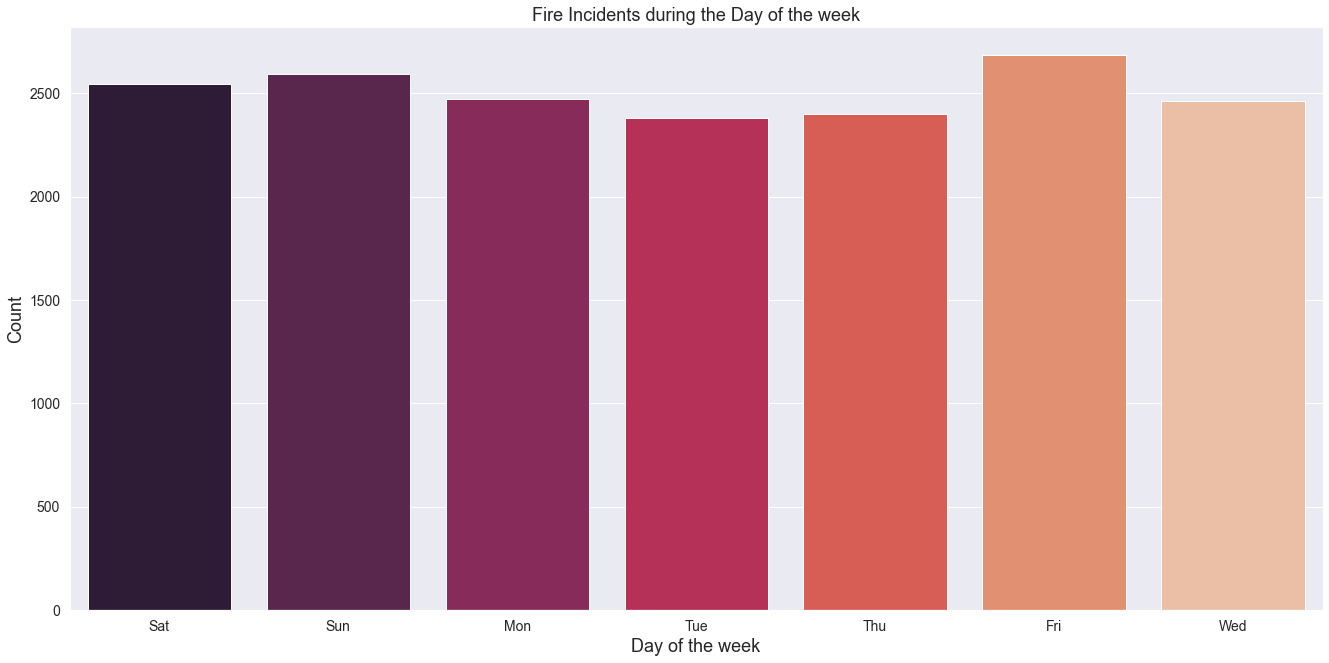

In [77]:
fig1 = plt.figure(figsize=(20, 10))
fig1 = sns.countplot(x='Day of Week',data=fire_data,palette='rocket')
plt.title('Fire Incidents during the Day of the week', fontsize=18)#title
fig1.xaxis.set_tick_params(labelsize=14)
fig1.yaxis.set_tick_params(labelsize=14)
fig1.set_xlabel('Day of the week', fontsize=18)#xlabel
fig1.set_ylabel('Count', fontsize=18)#ylabel

In [37]:
fire_data['Day of Week'].value_counts().head(20).to_frame(name='Count').reset_index().style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,Fri,2685
1,Sun,2593
2,Sat,2545
3,Mon,2473
4,Wed,2464
5,Thu,2398
6,Tue,2378


Takeaways: Days which are more likely to have incidents are:
- Friday
- Sunday
- Saturday
- Monday

#### Month

Text(0, 0.5, 'Count')

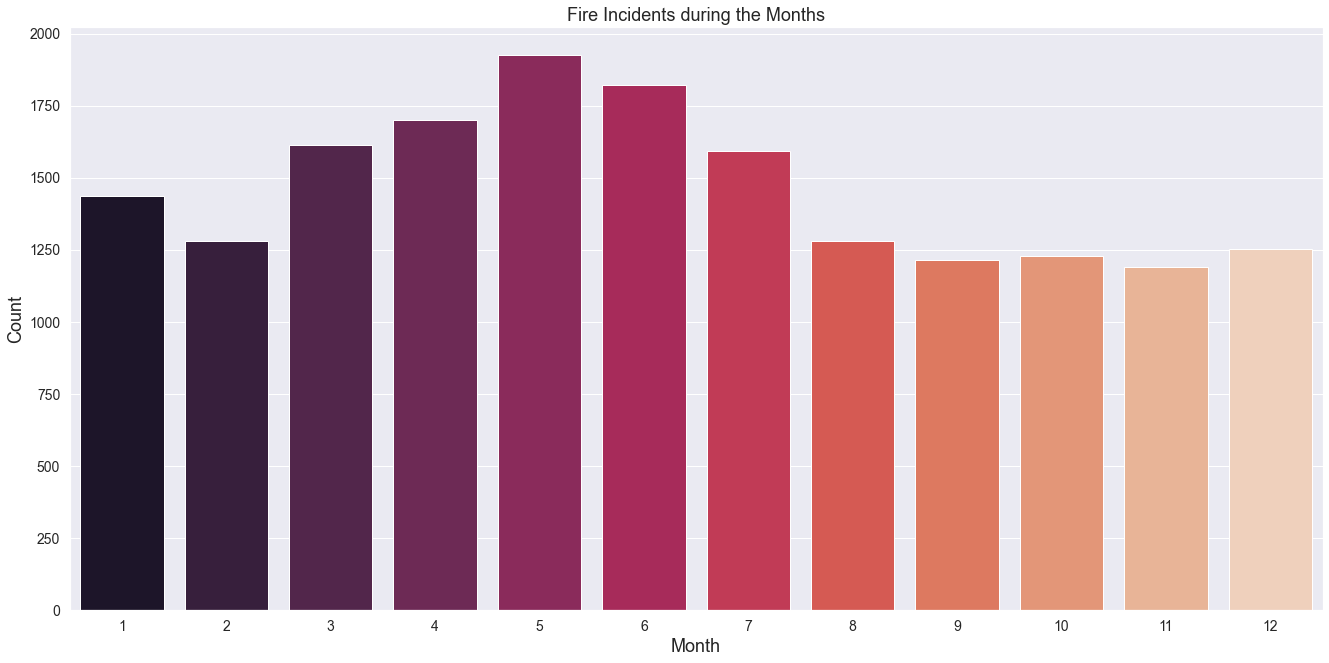

In [79]:
fig2 = plt.figure(figsize=(20, 10))
fig2 = sns.countplot(x='Month',data=fire_data,palette='rocket')
plt.title('Fire Incidents during the Months', fontsize=18)#title
fig2.xaxis.set_tick_params(labelsize=14)
fig2.yaxis.set_tick_params(labelsize=14)
fig2.set_xlabel('Month', fontsize=18)#xlabel
fig2.set_ylabel('Count', fontsize=18)#ylabel

In [82]:
fire_data['Month'].value_counts().head(20).to_frame(name='Count').reset_index().style.background_gradient(cmap='Reds', subset='Count')


,index,Count
0,5,1926
1,6,1822
2,4,1699
3,3,1612
4,7,1592
5,1,1437
6,2,1279
7,8,1279
8,12,1253
9,10,1230


#### Year

In [42]:
fire_data['Year'] = fire_data['TFS_Alarm_Time'].apply(lambda time:time.year)

Text(0, 0.5, 'Count')

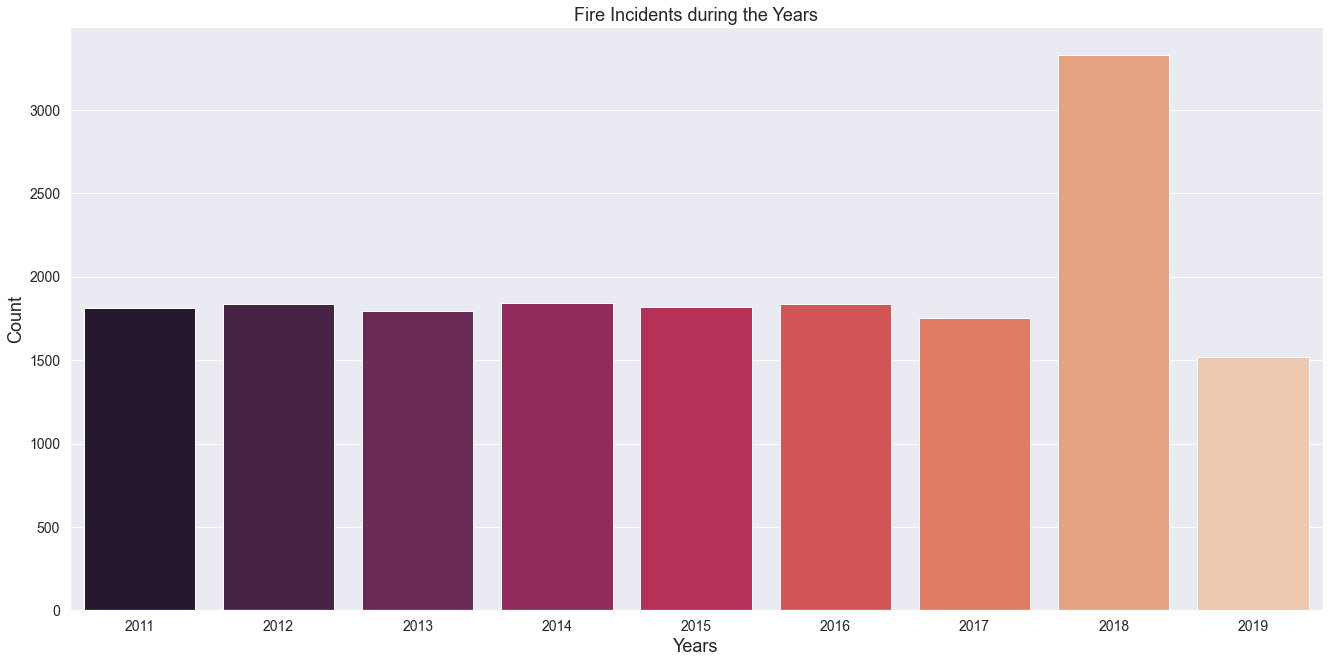

In [83]:

fig3 = plt.figure(figsize=(20, 10))
fig3 = sns.countplot(x='Year',data=fire_data,palette='rocket')
plt.title('Fire Incidents during the Years', fontsize=18)#title
fig3.xaxis.set_tick_params(labelsize=14)
fig3.yaxis.set_tick_params(labelsize=14)
fig3.set_xlabel('Years', fontsize=18)#xlabel
fig3.set_ylabel('Count', fontsize=18)#ylabel

In [84]:
fire_data['Year'].value_counts().head(20).to_frame(name='Count').reset_index().style.background_gradient(cmap = 'Reds', subset = 'Count')

,index,Count
0,2018,3330
1,2014,1843
2,2016,1834
3,2012,1834
4,2015,1816
5,2011,1811
6,2013,1796
7,2017,1753
8,2019,1519


In [85]:
byMonth=fire_data.groupby('Month').count()
byMonth.head(12)

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,null_fire_alarm_system,Hour,Day of Week,Year
Month,,,,,,,,,,,,,,,,,,,,,
1,1437,1347,1033,1033,1437,1437,1347,1033,1347,1033,...,1033,1033,1347,1437,1437,1437,1437,1437,1437,1437
2,1279,1202,901,901,1279,1279,1202,901,1202,901,...,901,901,1202,1279,1279,1279,1279,1279,1279,1279
3,1612,1415,1024,1024,1612,1612,1415,1024,1415,1024,...,1024,1024,1415,1612,1612,1612,1612,1612,1612,1612
4,1699,1478,1099,1098,1699,1699,1477,1099,1477,1098,...,1098,1098,1477,1699,1699,1699,1699,1699,1699,1699
5,1926,1563,1089,1089,1926,1926,1564,1089,1563,1089,...,1089,1089,1563,1926,1926,1926,1926,1926,1926,1926
6,1822,1513,1041,1041,1822,1822,1513,1041,1513,1041,...,1041,1041,1513,1822,1822,1822,1822,1822,1822,1822
7,1592,1366,929,929,1592,1592,1366,929,1366,929,...,929,929,1366,1592,1592,1592,1592,1592,1592,1592
8,1279,1166,809,809,1279,1279,1168,809,1166,809,...,809,809,1166,1279,1279,1279,1279,1279,1279,1279
9,1215,1125,763,763,1215,1215,1125,763,1125,763,...,763,763,1125,1215,1215,1215,1215,1215,1215,1215


In [87]:
dayHour = fire_data.groupby(by=['Day of Week','Hour']).count()['_id'].unstack()
dayHour.head(7)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,80,83,87,71,43,50,64,71,57,99,...,153,157,179,170,157,154,154,141,143,94
Mon,75,65,59,37,49,50,61,76,99,83,...,134,149,153,132,171,146,147,115,123,106
Sat,103,81,78,79,81,53,49,59,59,70,...,134,149,140,140,160,166,128,132,127,108
Sun,97,110,88,81,64,62,59,58,63,75,...,117,133,152,154,143,158,140,145,130,112
Thu,86,77,59,57,51,43,57,65,75,87,...,106,148,135,148,163,147,136,128,87,88
Tue,71,66,59,63,47,38,45,69,68,86,...,137,124,138,170,150,149,143,123,119,89
Wed,73,83,74,69,36,48,57,64,87,94,...,130,146,142,134,166,142,151,140,101,94


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

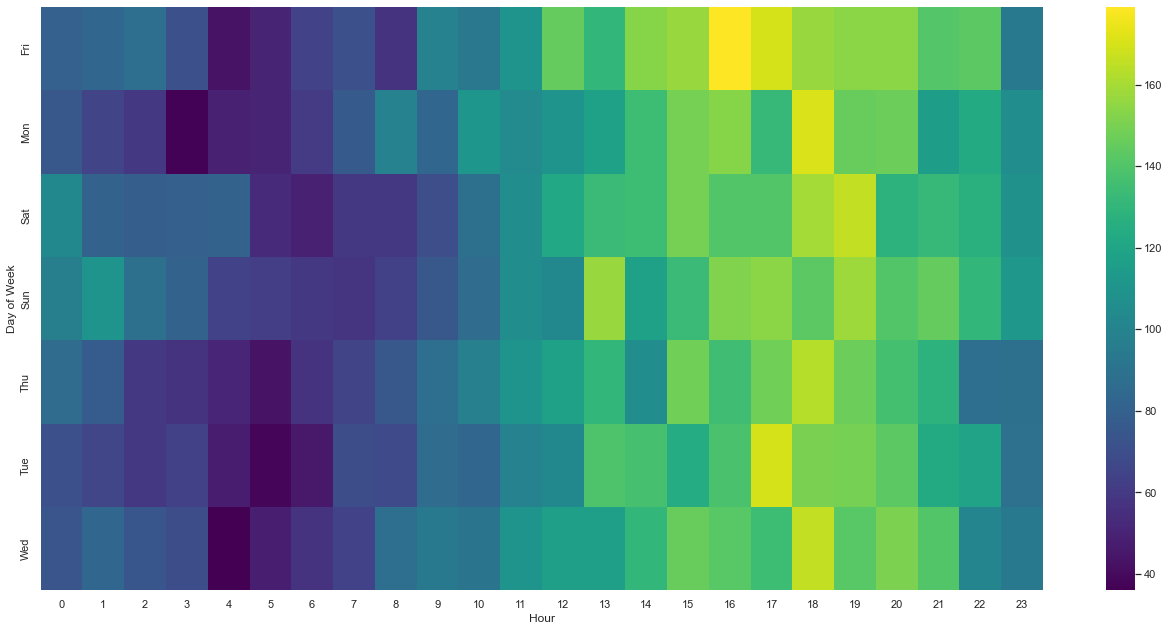

In [49]:
sns.heatmap(dayHour, cmap='viridis')


In [50]:
dayMonth = fire_data.groupby(by=['Day of Week','Month']).count()['_id'].unstack()
dayMonth.head()


Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,208,202,241,247,289,272,225,235,183,186,205,192
Mon,212,189,210,229,286,239,251,170,167,175,153,192
Sat,209,201,273,247,264,271,230,166,174,175,152,183
Sun,201,161,226,254,275,284,268,193,196,174,177,184
Thu,204,171,214,231,256,253,197,190,163,173,173,173


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

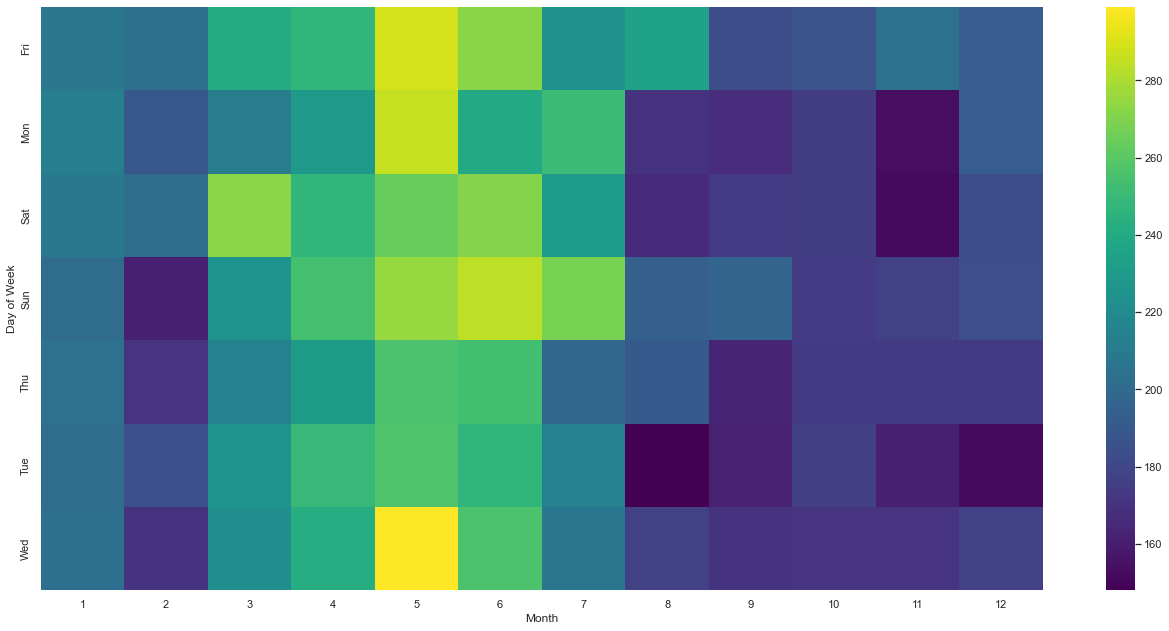

In [51]:
sns.heatmap(dayMonth, cmap='viridis')


In [54]:
monthYear = fire_data.groupby(by=['Month','Year']).count()['_id'].unstack()
monthYear.head(20)


Year,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,
1,131.0,159.0,151.0,175.0,148.0,142.0,132.0,190.0,209.0
2,131.0,107.0,122.0,149.0,158.0,125.0,129.0,184.0,174.0
3,173.0,164.0,125.0,161.0,166.0,141.0,147.0,302.0,233.0
4,135.0,206.0,150.0,184.0,177.0,161.0,157.0,271.0,258.0
5,142.0,174.0,174.0,190.0,206.0,192.0,150.0,395.0,303.0
6,166.0,152.0,147.0,162.0,135.0,203.0,152.0,363.0,342.0
7,187.0,180.0,166.0,143.0,170.0,201.0,155.0,390.0,NaN
8,163.0,149.0,153.0,150.0,115.0,124.0,153.0,272.0,NaN
9,136.0,122.0,136.0,115.0,121.0,146.0,167.0,272.0,NaN


<AxesSubplot:xlabel='Year', ylabel='Month'>

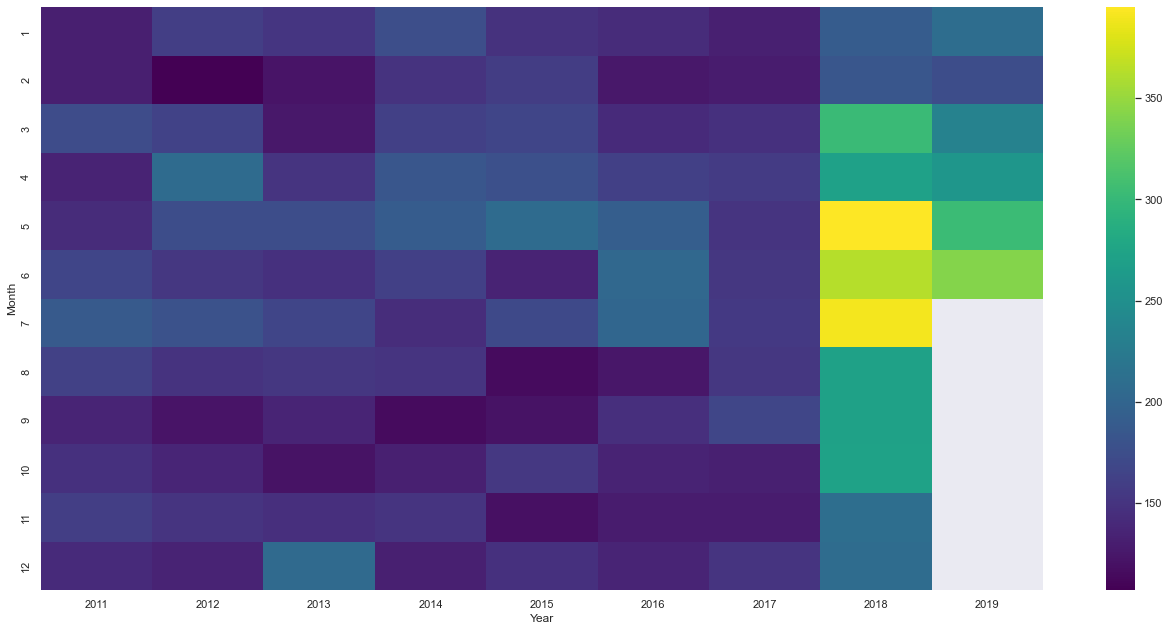

In [53]:
sns.heatmap(monthYear, cmap = 'viridis')


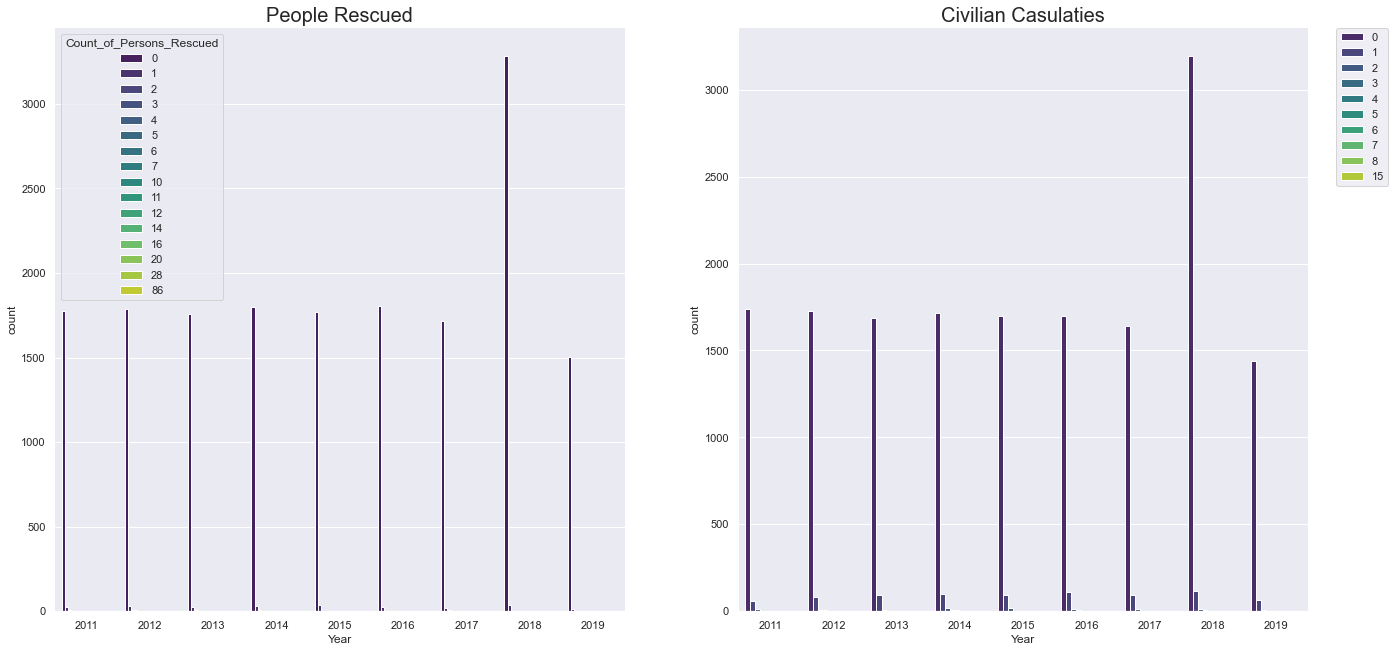

In [55]:
fig, axes = plt.subplots(1,2,figsize =(20,10))

sns.countplot(x='Year', data=fire_data,hue = 'Count_of_Persons_Rescued', palette='viridis', ax=axes[0])
axes[0].set_title('People Rescued', size=20)

sns.countplot(x='Year', data=fire_data,hue='Civilian_Casualties', palette='viridis', ax=axes[1])
axes[1].set_title('Civilian Casulaties', size=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

sns.despine(bottom=False, left=True)

In [56]:
fire_data['Civilian_Casualties'].value_counts().head(40).to_frame(name='Counts').reset_index().style.background_gradient(cmap='Reds', subset='Counts')

,index,Counts
0,0,16543
1,1,807
2,2,116
3,3,40
4,4,20
5,6,4
6,8,2
7,5,2
8,15,1
9,7,1


<AxesSubplot:xlabel='Year', ylabel='count'>

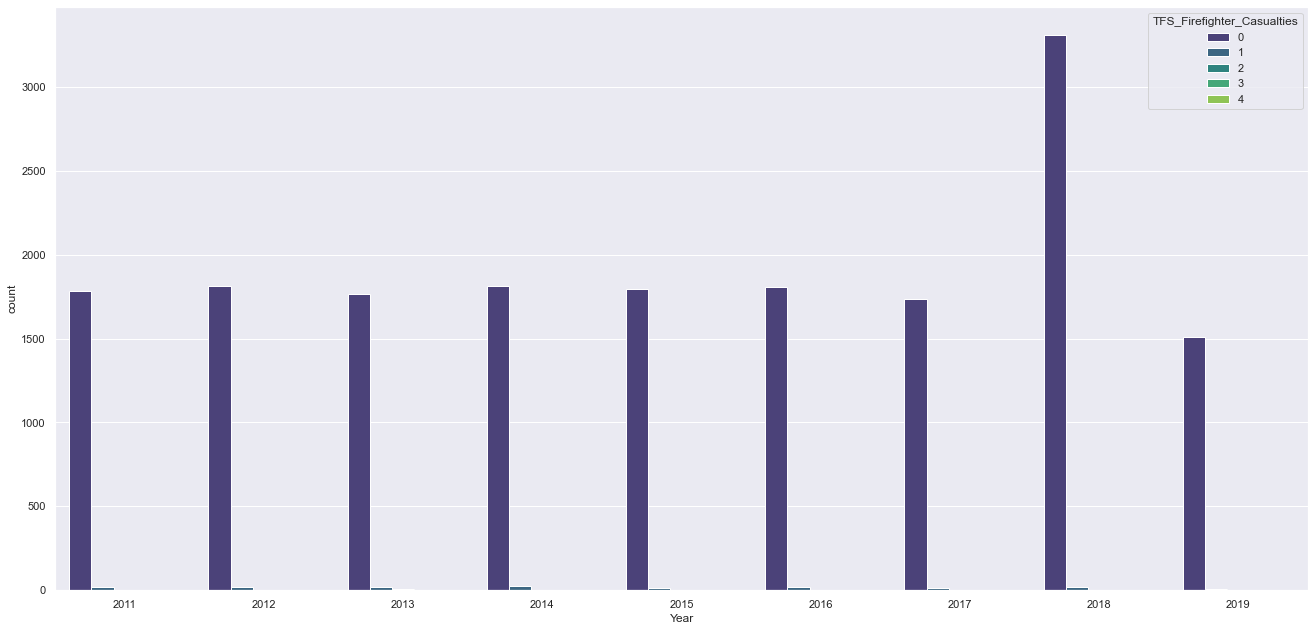

In [62]:
sns.countplot(x = 'Year',data = fire_data, hue ='TFS_Firefighter_Casualties', palette = 'viridis')


In [91]:
### Important Data! Identify Sation 426- near parkdale? Why is this station respondong most? close to most incidents?

In [90]:
fire_data['Incident_Station_Area'].value_counts().head().to_frame(name='Count').reset_index().style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,426,560
1,325,457
2,142,448
3,411,407
4,314,399


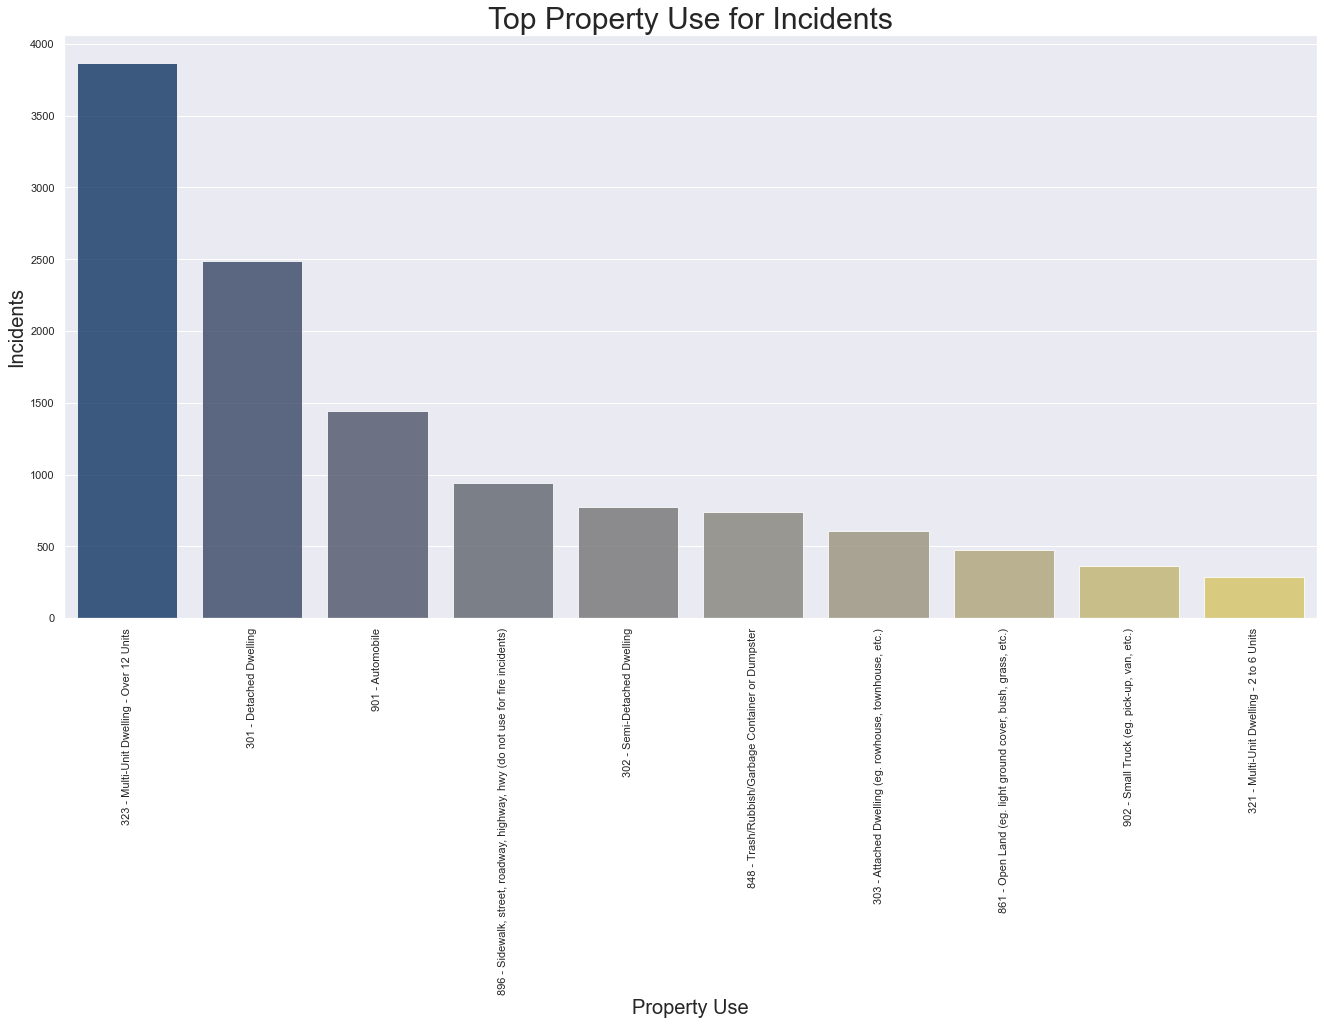

In [67]:
property_count = fire_data['Property_Use'].value_counts()
property_count = property_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(x=property_count.index,y=property_count.values, alpha=0.8, palette='cividis')
plt.title('Top Property Use for Incidents', fontsize = 30)
plt.xlabel('Property Use', fontsize = 20)
plt.ylabel('Incidents', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [68]:
fire_data['Property_Use'].value_counts()\
                    .head()\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap = 'Reds', subset='Count')

,index,Count
0,323 - Multi-Unit Dwelling - Over 12 Units,3869
1,301 - Detached Dwelling,2486
2,901 - Automobile,1444
3,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",942
4,302 - Semi-Detached Dwelling,774


In [69]:
fire_data['Material_First_Ignited'].value_counts()\
                            .head(20)\
                            .to_frame(name='Count')\
                            .reset_index()\
                            .style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,99 - Undetermined (formerly 98),2390
1,"46 - Rubbish, Trash, Waste",1827
2,"74 - Cooking Oil, Grease",1457
3,47 - Vehicle,1212
4,43 - Electrical Wiring Insulation,1111
5,97 - Other,954
6,55 - Wood,533
7,"56 - Paper, Cardboard",475
8,54 - Plastic,473
9,14 - Interior Wall/Ceiling,402


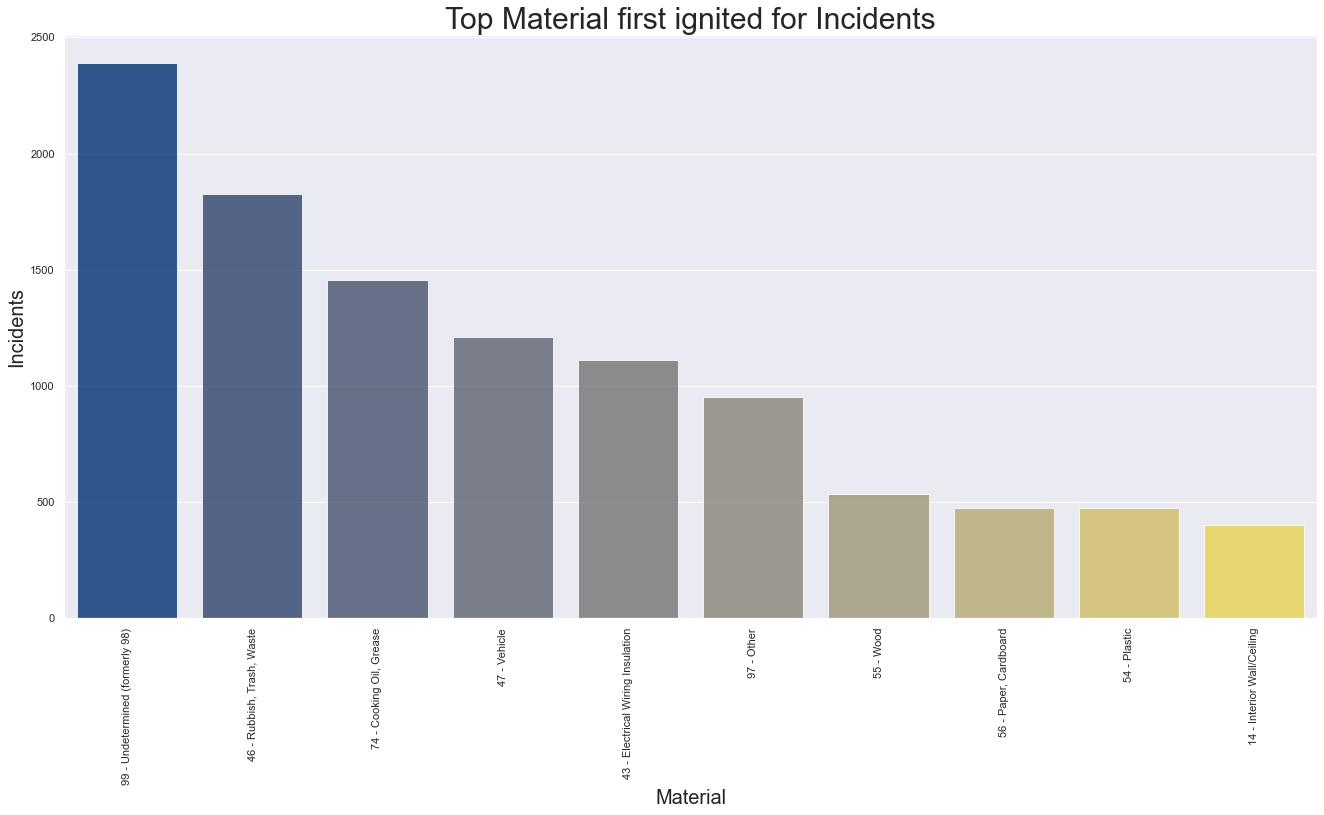

In [71]:
material_count = fire_data['Material_First_Ignited'].value_counts()
material_count = material_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(x=material_count.index,y=material_count.values, alpha=0.8, saturation =1, palette='cividis')
plt.title('Top Material first ignited for Incidents', fontsize = 30)
plt.xlabel('Material', fontsize = 20)
plt.ylabel('Incidents', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [112]:
fire_data['response_time(min)'] =fire_data['TFS_Arrival_Time'] - fire_data['TFS_Alarm_Time']
fire_data['response_time(min)'] = fire_data['response_time(min)'].dt.total_seconds()/60

In [113]:
fire_data.head(100)

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,null_fire_alarm_system,Hour,Month,Day of Week,Year,response_time,response_time(min)
0,578689,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,2018-02-24 21:12:00,NaN,...,2018-02-24 21:04:29,2018-02-24 21:10:11,0,True,21,2,Sat,2018,5.700000,5.700000
1,578690,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,2018-02-24 21:29:42,NaN,...,2018-02-24 21:24:43,2018-02-24 21:29:31,0,True,21,2,Sat,2018,4.800000,4.800000
2,578691,NaN,NaN,NaN,0,0,NaN,NaN,NaT,NaN,...,2018-02-25 13:29:59,2018-02-25 13:36:49,0,True,13,2,Sun,2018,6.833333,6.833333
3,578692,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,2018-02-25 14:19:25,1 - Confined to object of origin,...,2018-02-25 14:13:39,2018-02-25 14:18:07,0,False,14,2,Sun,2018,4.466667,4.466667
4,578693,NaN,NaN,NaN,0,0,NaN,NaN,NaT,NaN,...,2018-02-25 18:20:43,2018-02-25 18:26:19,0,True,18,2,Sun,2018,5.600000,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,578784,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,500.0,NaN,2018-03-31 07:13:30,NaN,...,2018-03-31 07:07:38,2018-03-31 07:12:40,0,True,7,3,Sat,2018,5.033333,5.033333
96,578785,NaN,NaN,NaN,0,0,NaN,NaN,NaT,NaN,...,2018-03-31 12:41:46,2018-03-31 12:47:50,0,True,12,3,Sat,2018,6.066667,6.066667
97,578786,89 - Other Vehicle Area,NaN,NaN,0,0,1000.0,NaN,2018-03-31 14:05:00,NaN,...,2018-03-31 13:59:10,2018-03-31 14:04:03,0,True,13,3,Sat,2018,4.883333,4.883333
98,578787,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),9 - Undetermined,1,0,30000.0,1.0,2018-01-02 06:35:00,3 - Spread to entire room of origin,...,2018-01-02 06:24:18,2018-01-02 06:30:07,0,False,6,1,Tue,2018,5.816667,5.816667


In [114]:
correlation = fire_data.corr()


In [115]:
correlation

,_id,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Number_of_responding_apparatus,Number_of_responding_personnel,TFS_Firefighter_Casualties,null_fire_alarm_system,Hour,Month,Year,response_time,response_time(min)
_id,1.000000,0.077690,0.010367,0.008874,0.026189,0.031000,0.268360,-0.011211,-0.020516,0.239642,0.240682,0.061647,-0.364311,-0.020982,0.108349,-0.541967,-0.024441,-0.024441
Civilian_Casualties,0.077690,1.000000,0.153267,0.016699,0.032552,0.013575,-0.002816,0.002806,-0.017009,0.149682,0.146202,0.052862,-0.134635,-0.022730,-0.002774,-0.008453,-0.012701,-0.012701
Count_of_Persons_Rescued,0.010367,0.153267,1.000000,0.013733,0.007880,-0.003587,0.001914,-0.000208,-0.000005,0.063579,0.060434,0.028896,-0.032951,-0.019704,0.005214,0.003670,-0.003627,-0.003627
Estimated_Dollar_Loss,0.008874,0.016699,0.013733,1.000000,0.115061,0.012884,-0.011550,-0.000970,-0.006029,0.366249,0.366768,0.063272,-0.027860,-0.029025,-0.013944,0.022418,0.000429,0.000429
Estimated_Number_Of_Persons_Displaced,0.026189,0.032552,0.007880,0.115061,1.000000,0.003750,-0.002317,0.004670,-0.001197,0.234265,0.234586,0.101038,-0.001370,-0.016939,-0.011050,-0.007768,0.003529,0.003529
Incident_Station_Area,0.031000,0.013575,-0.003587,0.012884,0.003750,1.000000,-0.388277,-0.640792,-0.435927,0.013163,0.010872,0.020925,-0.039715,-0.033153,-0.012624,-0.016616,-0.018605,-0.018605
Incident_Ward,0.268360,-0.002816,0.001914,-0.011550,-0.002317,-0.388277,1.000000,0.365956,0.872481,0.047422,0.052075,0.010673,-0.122619,-0.003745,0.043165,-0.265554,0.002656,0.002656
Latitude,-0.011211,0.002806,-0.000208,-0.000970,0.004670,-0.640792,0.365956,1.000000,0.349856,-0.008821,-0.002550,-0.026027,0.069694,0.035473,-0.000244,-0.004678,0.057220,0.057220
Longitude,-0.020516,-0.017009,-0.000005,-0.006029,-0.001197,-0.435927,0.872481,0.349856,1.000000,0.006874,0.010269,-0.004175,-0.014853,0.007278,0.003380,0.015600,0.004925,0.004925
Number_of_responding_apparatus,0.239642,0.149682,0.063579,0.366249,0.234265,0.013163,0.047422,-0.008821,0.006874,1.000000,0.996649,0.266751,-0.404000,-0.064716,-0.013264,-0.066042,-0.026271,-0.026271


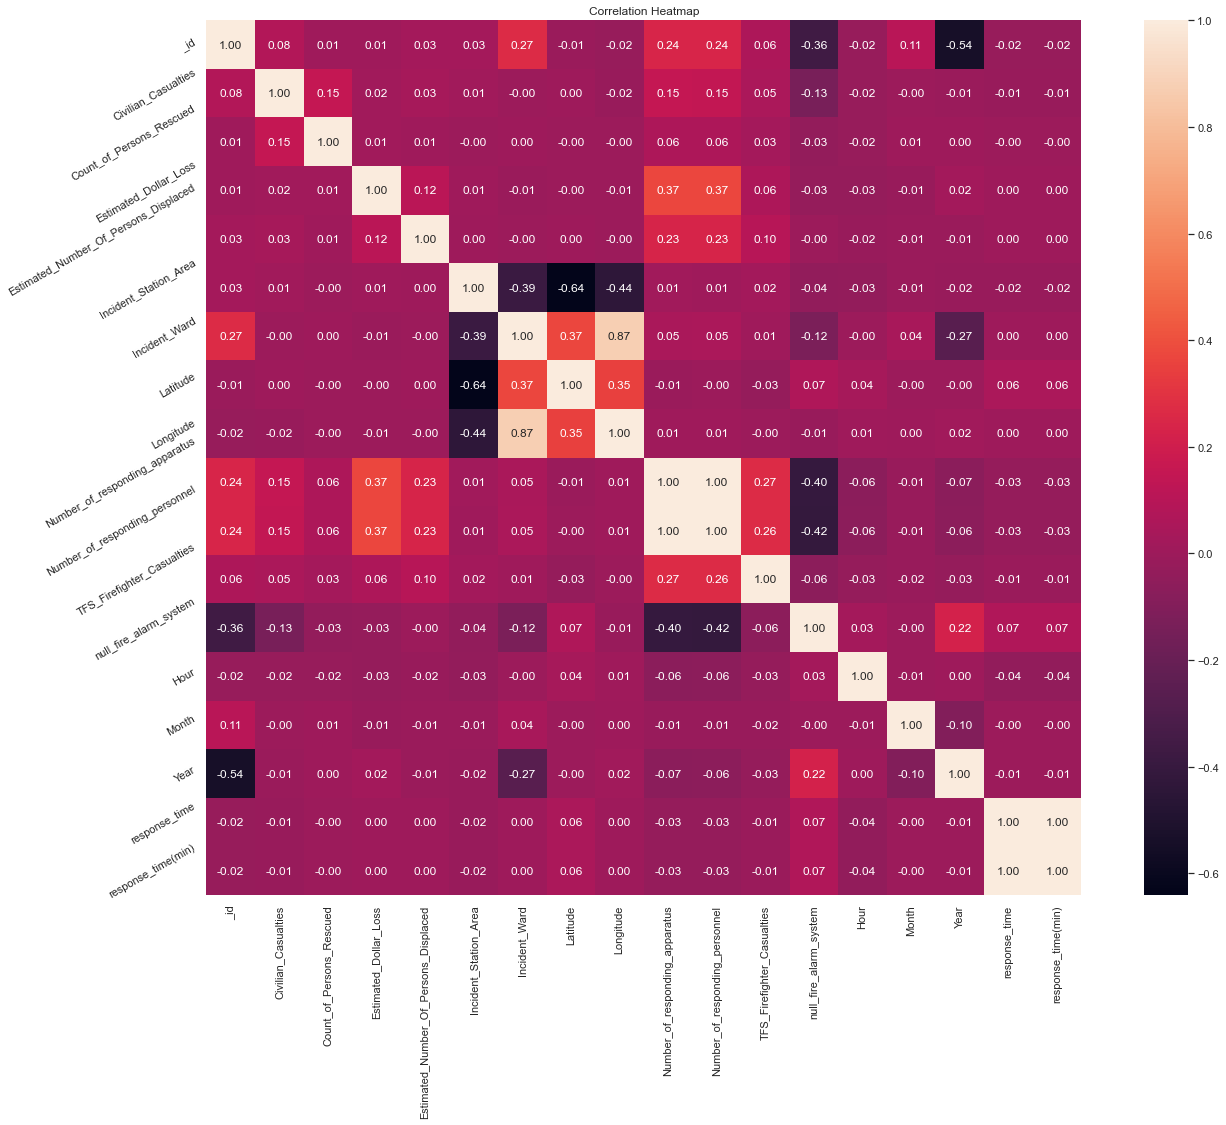

In [116]:
#graphing the matrix
plt.figure(figsize=(20,15))
plt.title('Correlation Heatmap')#title
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()